In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
url = 'logs/models.txt'
df = pd.read_csv(url)

In [16]:
df.describe()

,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days)
count,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,3.500000e+01
mean,6.351510e+09,5.052139e+07,6.351510,0.006352,50.521395,21.608642,4.573087e+07
std,6.685961e+09,5.508621e+07,6.685961,0.006686,55.086208,1.749834,4.813892e+07
min,4.252426e+07,1.235496e+06,0.042524,0.000043,1.235496,17.565585,3.061746e+05
25%,5.659043e+08,5.332784e+06,0.565904,0.000566,5.332784,20.152971,4.074511e+06
50%,4.111515e+09,2.383457e+07,4.111515,0.004112,23.834568,22.137057,2.960291e+07
75%,1.133300e+10,1.078390e+08,11.333002,0.011333,107.839016,23.150984,8.159762e+07
max,2.279560e+10,1.436782e+08,22.795602,0.022796,143.678248,23.849833,1.641283e+08


In [4]:
df['GFLOPS'] = (df['macs']) / (10 ** 9) 
df['TFLOPS'] = (df['macs']) / (10 ** 12)
df['Params(Million)'] = df['parameters'] / (10 ** 6)
df['Log'] = np.log(df['macs'])
df['Training 1 epoch(pfs-days)'] = df['GFLOPS'] * 2 * 3 * (1.2 * (10 ** 6))

In [5]:
df.head()

,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days)
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06
1,densenet121,2.865672e+09,7978856.0,2.865672,0.002866,7.978856,21.776069,2.063284e+07
2,densenet161,7.787013e+09,28681000.0,7.787013,0.007787,28.681000,22.775723,5.606649e+07
3,densenet169,3.398071e+09,14149480.0,3.398071,0.003398,14.149480,21.946474,2.446611e+07
4,densenet201,4.340971e+09,20013928.0,4.340971,0.004341,20.013928,22.191364,3.125499e+07


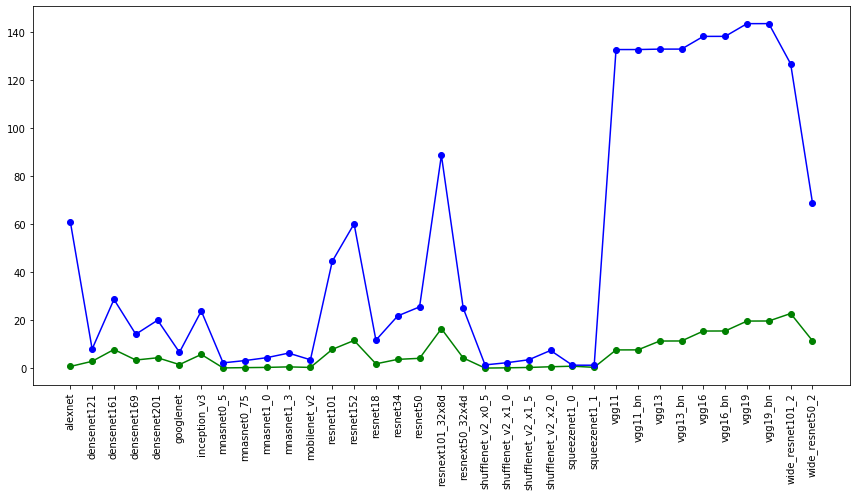

In [6]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['model'],df['GFLOPS'],marker = "o",color='green')
plt.plot(df['model'],df['Params(Million)'],marker = "o",color='blue')
plt.xticks( rotation='vertical')
plt.tight_layout()
plt.show()

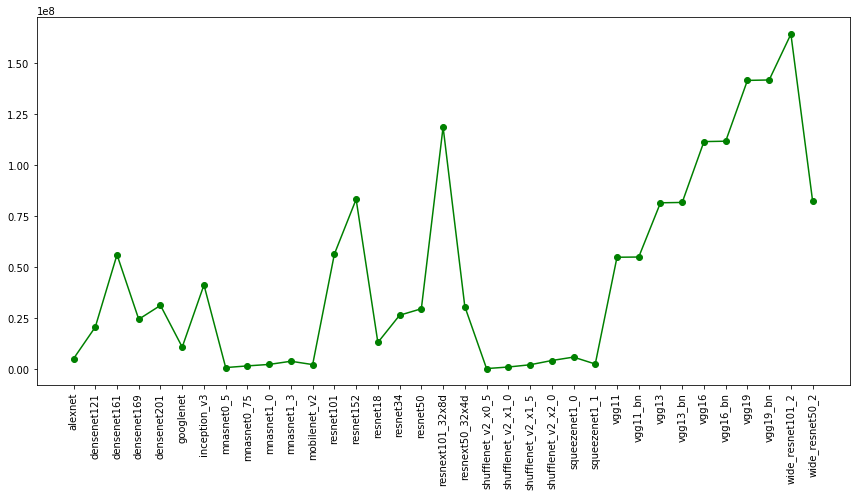

In [7]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['model'],df['Training 1 epoch(pfs-days)'],marker = "o",color='green')
plt.xticks( rotation='vertical')
plt.tight_layout()
plt.show()

In [8]:
#get accuracy 

In [9]:
url = "logs/accuracy.csv" ##top 1 and top 5 error
df_accuracy = pd.read_csv(url)

In [11]:
merge_df = df.merge(df_accuracy, on='model')

In [12]:
merge_df

,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days),top1,top5
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06,43.45,20.910
1,googlenet,1.504880e+09,6624904.0,1.504880,0.001505,6.624904,21.131979,1.083513e+07,30.22,10.470
2,inception_v3,5.731151e+09,23834568.0,5.731151,0.005731,23.834568,22.469182,4.126429e+07,22.55,6.440
3,mnasnet1_0,3.253292e+08,4383312.0,0.325329,0.000325,4.383312,19.600348,2.342370e+06,26.49,8.456
4,mobilenet_v2,3.141305e+08,3504872.0,0.314130,0.000314,3.504872,19.565319,2.261740e+06,28.12,9.710
5,resnet101,7.833972e+09,44549160.0,7.833972,0.007834,44.549160,22.781735,5.640460e+07,22.63,6.440
6,resnet152,1.155884e+10,60192808.0,11.558837,0.011559,60.192808,23.170716,8.322363e+07,21.69,5.940
7,resnet18,1.819066e+09,11689512.0,1.819066,0.001819,11.689512,21.321589,1.309728e+07,30.24,10.920
8,resnet34,3.671263e+09,21797672.0,3.671263,0.003671,21.797672,22.023802,2.643310e+07,26.70,8.580
9,resnet50,4.111515e+09,25557032.0,4.111515,0.004112,25.557032,22.137057,2.960291e+07,23.85,7.130


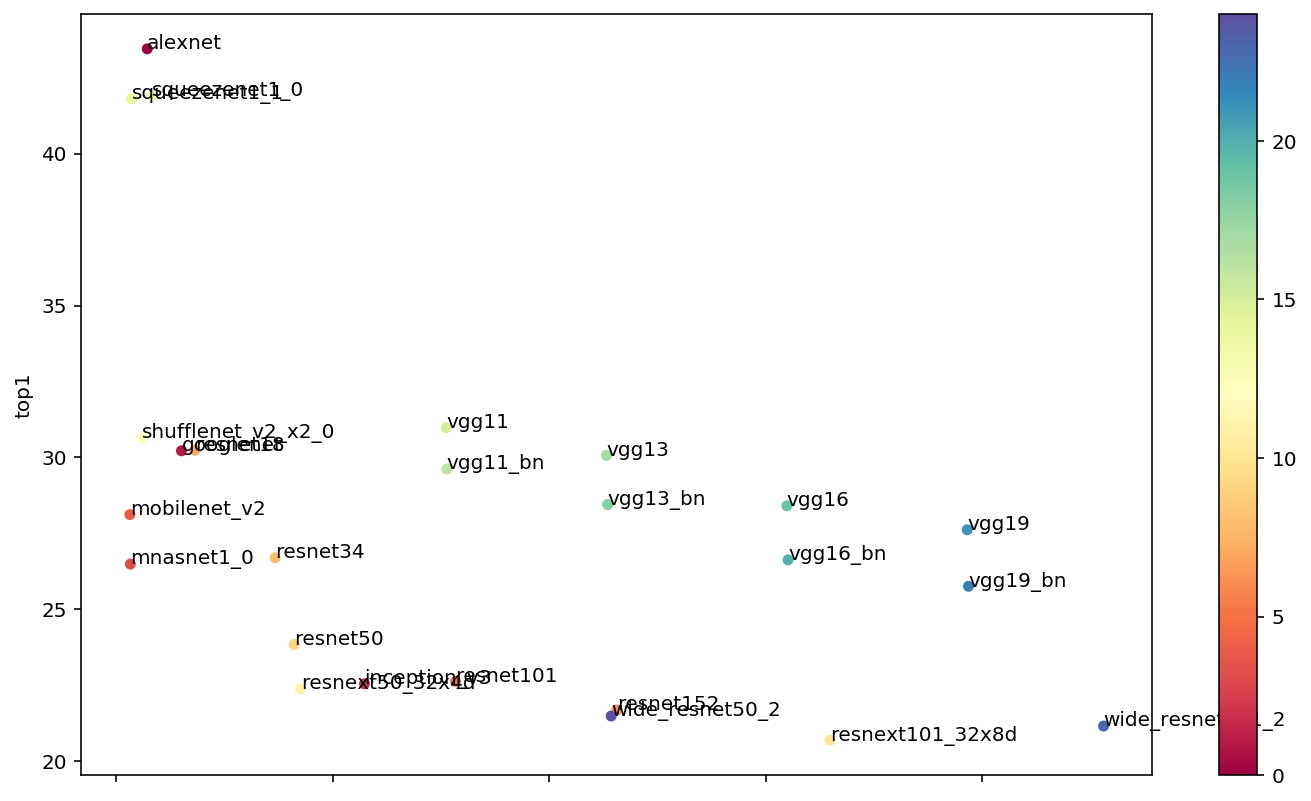

In [33]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
#merge_df.plot.scatter(x ='top1', y='GFLOPS')

ax = merge_df.plot('GFLOPS', 'top1', kind='scatter',
        c=range(len(merge_df)), colormap=cmap, figsize=(12,7))
merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
